In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [4]:
car_data = pd.read_csv('car_data.csv')

In [5]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
car_data.shape

(4340, 8)

In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [8]:
car_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [9]:
print(car_data.fuel.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64


In [10]:
print(car_data.seller_type.value_counts())

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64


In [11]:
print(car_data.transmission.value_counts())

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


In [12]:
print(car_data.owner.value_counts())

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


### Encoding the Categorical Data

In [13]:
# encoding "Fuel_Type" column
car_data['fuel'] = car_data['fuel'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4})

# encoding 'Seller_Type' column
car_data['seller_type'] = car_data['seller_type'].map({'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2})

# encoding 'Transmission' column
car_data['transmission'] = car_data['transmission'].map({'Manual': 0, 'Automatic': 1})

# encoding 'Owner' column
car_data['owner'] = car_data['owner'].map({'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, 'Test Drive Car': 4})


In [14]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


### Splitting the data into Training data and Testing data

In [20]:
X = car_data.drop(['name','selling_price'], axis=1)
Y = car_data['selling_price']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

## Loading the model

In [22]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

### Model evaluation

In [ ]:
## predicting on training data

training_data_prediction = model.predict(X_train)

# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

# mean absolute error
mae = metrics.mean_absolute_error(training_data_prediction, Y_train)
print("Mean Absolute Error : ", mae)

R squared error :  0.42832288947625363
Mean Absolute Error :  234643.1445849638


### Visualizing the error

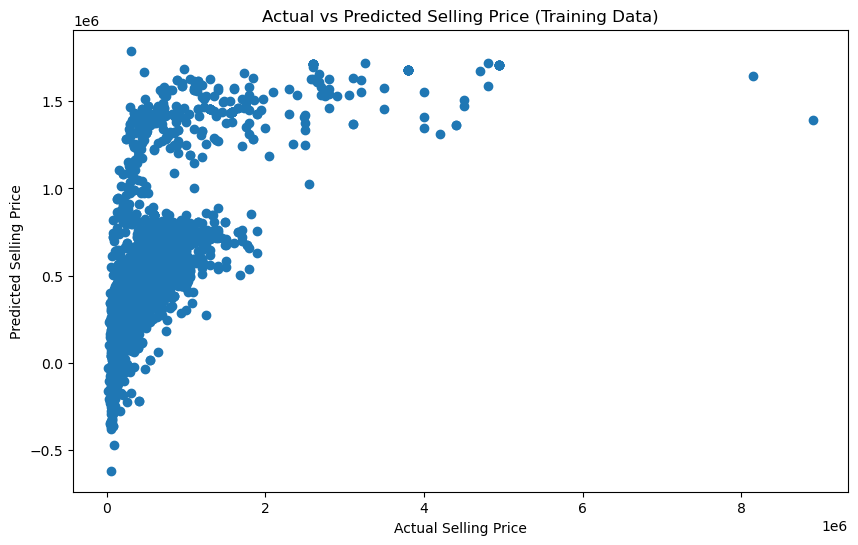

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Selling Price")  
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price (Training Data)")
plt.show()

In [29]:
## predicting on testing data

testing_data_prediction = model.predict(X_test)

# R squared error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R squared error : ", error_score)

# mean absolute error
mae = metrics.mean_absolute_error(testing_data_prediction, Y_test)
print("Mean Absolute Error : ", mae)

R squared error :  0.4918005460679499
Mean Absolute Error :  221544.3615264092


### Visualizing the error

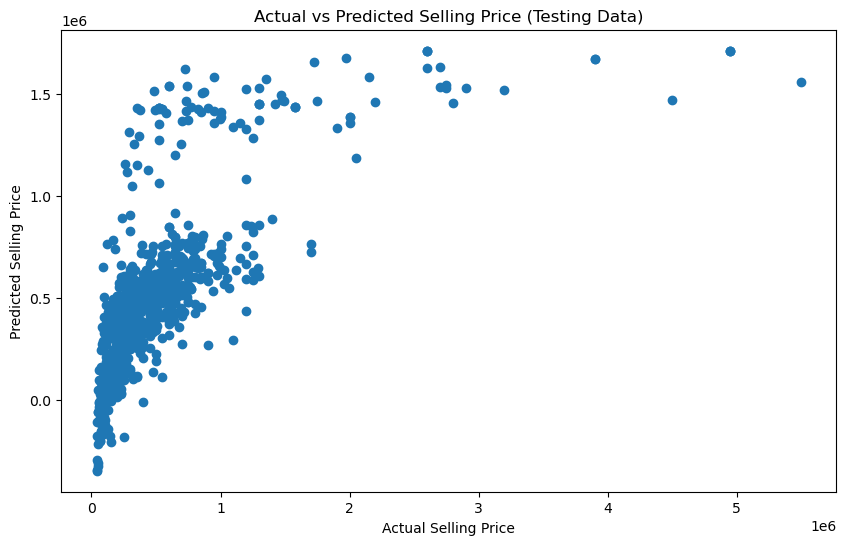

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Selling Price")  
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price (Testing Data)")
plt.show()

## Using the Lasso Regression

In [35]:
model1 = Lasso()

model1.fit(X_train, Y_train)

Lasso()

In [36]:
## predicting on training data 

training_data_prediction = model1.predict(X_train)

# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

# mean absolute error  
mae = metrics.mean_absolute_error(training_data_prediction, Y_train)
print("Mean Absolute Error : ", mae)

R squared error :  0.4283228894232849
Mean Absolute Error :  234642.63414465755


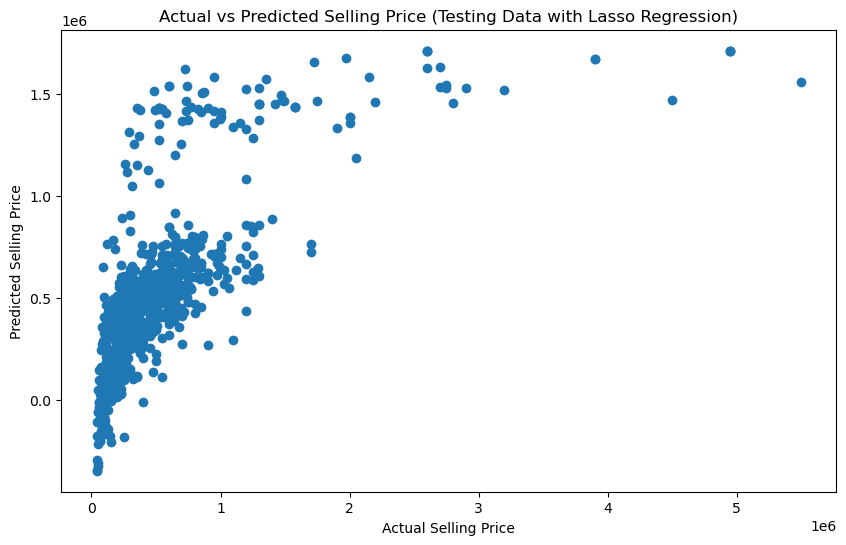

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Selling Price")      
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price (Testing Data with Lasso Regression)")
plt.show()

In [38]:
## predicting on testing data

testing_data_prediction = model.predict(X_test)

# R squared error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R squared error : ", error_score)

# mean absolute error
mae = metrics.mean_absolute_error(testing_data_prediction, Y_test)
print("Mean Absolute Error : ", mae)

R squared error :  0.4918002542217491
Mean Absolute Error :  221543.88711639072


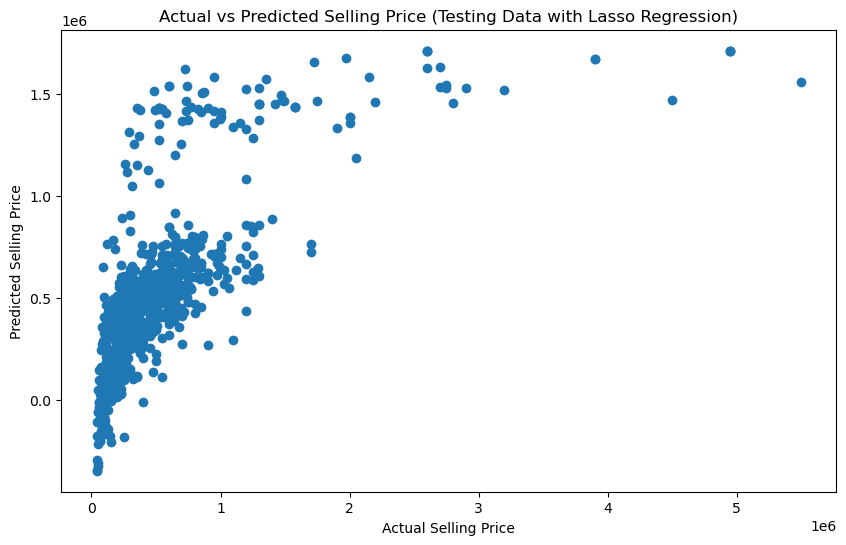

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price (Testing Data with Lasso Regression)")
plt.show()